## Average temperature anomaly, Global

Global average land-sea temperature anomaly relative to the 1961-1990 average temperature.

### Data Loading

Import necessary liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
import plotly.graph_objects as go
import seaborn as sns

sns.set()

import warnings

warnings.filterwarnings('ignore')

Load the data

In [2]:
data = pd.read_csv('temperature-anomaly.csv')
data

Entity  Code  Year  \
0                 Global   NaN  1850   
1                 Global   NaN  1851   
2                 Global   NaN  1852   
3                 Global   NaN  1853   
4                 Global   NaN  1854   
..                   ...   ...   ...   
520  Southern hemisphere   NaN  2020   
521  Southern hemisphere   NaN  2021   
522  Southern hemisphere   NaN  2022   
523  Southern hemisphere   NaN  2023   
524  Southern hemisphere   NaN  2024   

     Global average temperature anomaly relative to 1961-1990  \
0                                            -0.417711          
1                                            -0.233350          
2                                            -0.229399          
3                                            -0.270354          
4                                            -0.291521          
..                                                 ...          
520                                           0.569932          
521                                           0.445618          
522                                           0.502809          
523                                           0.786759          
524                                           0.770763          

     Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                            -0.246166                         
1                                            -0.054832                         
2                                            -0.049416                         
3                                            -0.110700                         
4                                            -0.150330                         
..                                                 ...                         
520                                           0.622113                         
521                                           0.499061                         
522                                           0.557299                         
523                                           0.843433                         
524                                           1.051679                         

     Lower bound of the annual temperature anomaly (95% confidence interval)  
0                                            -0.589256                        
1                                            -0.411868                        
2                                            -0.409382                        
3                                            -0.430009                        
4                                            -0.432712                        
..                                                 ...                        
520                                           0.517750                        
521                                           0.392176                        
522                                           0.448319                        
523                                           0.730086                        
524                                           0.489846                        

[525 rows x 6 columns]

In [3]:
data = data[data["Entity"] == "Global"]
data.head(5)

Entity  Code  Year  \
0  Global   NaN  1850   
1  Global   NaN  1851   
2  Global   NaN  1852   
3  Global   NaN  1853   
4  Global   NaN  1854   

   Global average temperature anomaly relative to 1961-1990  \
0                                          -0.417711          
1                                          -0.233350          
2                                          -0.229399          
3                                          -0.270354          
4                                          -0.291521          

   Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.246166                         
1                                          -0.054832                         
2                                          -0.049416                         
3                                          -0.110700                         
4                                          -0.150330                         

   Lower bound of the annual temperature anomaly (95% confidence interval)  
0                                          -0.589256                        
1                                          -0.411868                        
2                                          -0.409382                        
3                                          -0.430009                        
4                                          -0.432712

### Data Preparation

Drop unnecessary column

In [4]:
data = data[["Year", "Global average temperature anomaly relative to 1961-1990"]]
data.head()

Year  Global average temperature anomaly relative to 1961-1990
0  1850                                          -0.417711       
1  1851                                          -0.233350       
2  1852                                          -0.229399       
3  1853                                          -0.270354       
4  1854                                          -0.291521

Checking data summary

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Year                                                      175 non-null    int64  
 1   Global average temperature anomaly relative to 1961-1990  175 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.1 KB


In [6]:
data.describe().T

count         mean  \
Year                                                175.0  1937.000000   
Global average temperature anomaly relative to ...  175.0    -0.065182   

                                                          std          min  \
Year                                                50.662281  1850.000000   
Global average temperature anomaly relative to ...   0.389236    -0.597511   

                                                            25%          50%  \
Year                                                1893.500000  1937.000000   
Global average temperature anomaly relative to ...    -0.341292    -0.174337   

                                                            75%          max  
Year                                                1980.500000  2024.000000  
Global average temperature anomaly relative to ...     0.093273     1.149746

Rename Column

In [7]:
data.rename(columns={"Global average temperature anomaly relative to 1961-1990":"Temperature"}, inplace=True)
data

Year  Temperature
0    1850    -0.417711
1    1851    -0.233350
2    1852    -0.229399
3    1853    -0.270354
4    1854    -0.291521
..    ...          ...
170  2020     0.922921
171  2021     0.761906
172  2022     0.801305
173  2023     1.100313
174  2024     1.149746

[175 rows x 2 columns]

In [8]:
data.to_csv('temp.csv', index=False)

### Time Series Analysis

Convert the 'Year' column to datetime type and then groupby the Year for time series analysis

In [9]:
# Convert the 'date' column to datetime format
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Groupby Year
data = data.groupby('Year')['Temperature'].mean()
data  = pd.DataFrame(data)
data

Temperature
Year                   
1850-01-01    -0.417711
1851-01-01    -0.233350
1852-01-01    -0.229399
1853-01-01    -0.270354
1854-01-01    -0.291521
...                 ...
2020-01-01     0.922921
2021-01-01     0.761906
2022-01-01     0.801305
2023-01-01     1.100313
2024-01-01     1.149746

[175 rows x 1 columns]

In [10]:
# Extract the 'Temperature' column as the time series data
ts_data = data['Temperature']

ts_data.head()

Year
1850-01-01   -0.417711
1851-01-01   -0.233350
1852-01-01   -0.229399
1853-01-01   -0.270354
1854-01-01   -0.291521
Name: Temperature, dtype: float64

#### Time Series Data Plotting

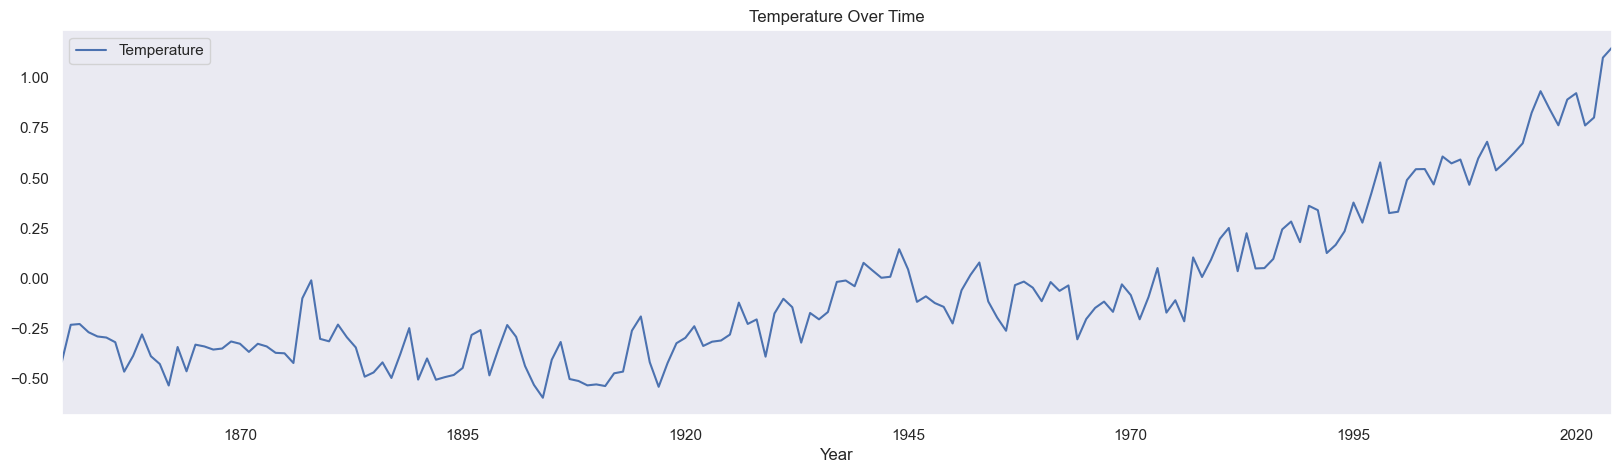

In [11]:
ts_data.plot(figsize=(20, 5))
plt.grid()
plt.legend(loc='best')
plt.title('Temperature Over Time')
plt.show(block=False);

**Insights from the Time Series Plot:**

1. **Overall Trend**: The temperature anomalies exhibit fluctuations over time, but there seems to be a clear upward trend, especially noticeable in the later years of the dataset. This suggests that, on average, temperatures have been increasing over the past century and a half.

2. **Variability**: While there's a general upward trend, there are periods of both higher and lower variability in temperature anomalies. This variability may be influenced by various factors such as natural climate oscillations, volcanic eruptions, solar activity, and human activities.

3. **Recent Acceleration**: In the latter half of the dataset (especially from the late 20th century onwards), there's a noticeable acceleration in the increase of temperature anomalies. This rapid rise in temperatures aligns with scientific consensus on the impact of human-induced climate change.

4. **Outliers**: The dataset contains some outliers, particularly notable spikes in temperature anomalies. These outliers may correspond to specific extreme weather events, El Niño or La Niña events, or other anomalous climatic phenomena.

5. **Descriptive Statistics**: The summary statistics provide additional insights, such as the mean temperature anomaly, standard deviation (indicating variability), and quartiles (showing the spread of the data). These statistics corroborate the observations of an overall upward trend and variability in the temperature anomalies.

6. **Recent Extremes**: The last few years of the dataset (e.g., 2020, 2021, 2022, 2023, 2024) show relatively high temperature anomalies compared to earlier years, suggesting recent extreme warmth.

7. **Long-Term Perspective**: By spanning from 1850 to 2024, the dataset provides a valuable long-term perspective on climate trends. This historical context is crucial for understanding current climate patterns and projecting future climate scenarios.

Overall, these insights highlight the significance of ongoing climate change and the urgency of mitigation and adaptation efforts to address its impacts on the environment, ecosystems, and human societies.

#### Additive seasonal decomposition

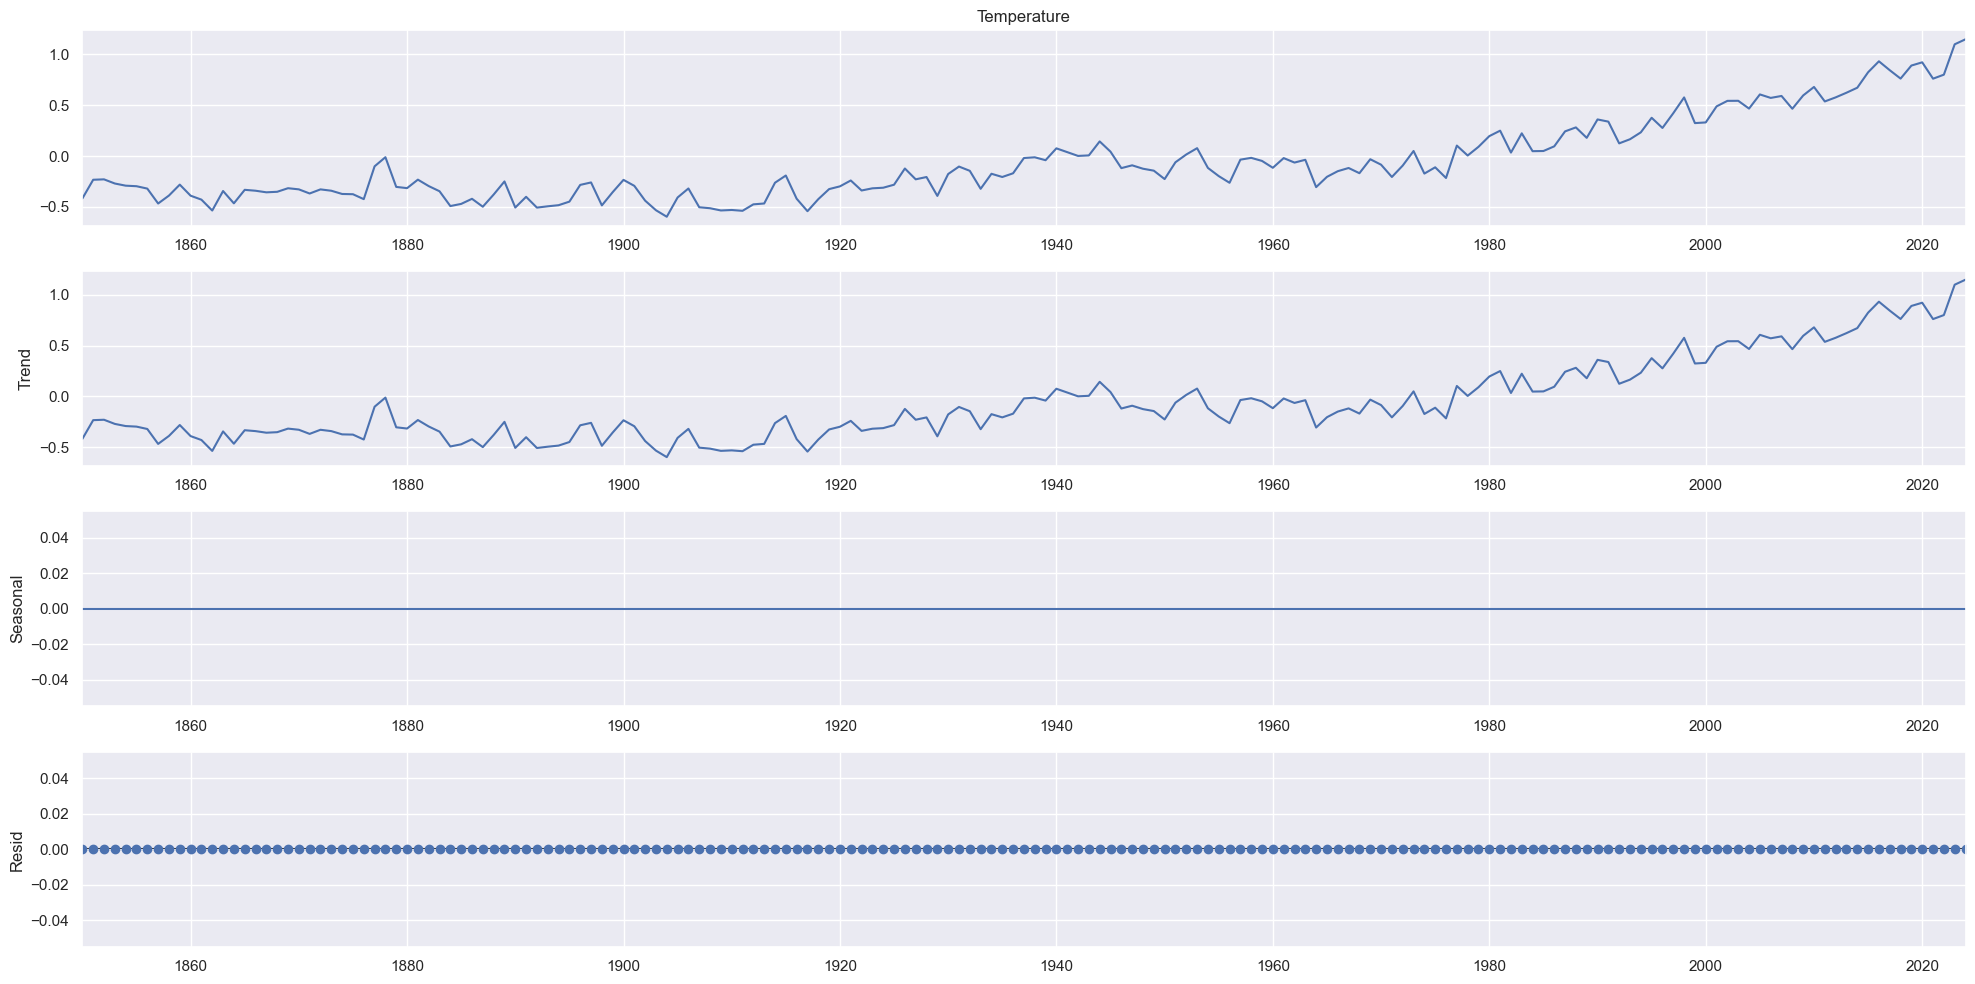

In [12]:
rcParams['figure.figsize'] = 20, 10
decomposition = seasonal_decompose(ts_data, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

**Insights gained from additive decomposition:**

1. **Trend Component**: The trend component shows the long-term behavior of the data, indicating the overall increasing trend in temperature anomalies. This component helps identify the underlying direction of the data series, which in this case confirms the long-term warming trend

2. **Minimal Seasonality**: The absence of significant seasonal variations indicates that the temperature do not exhibit strong cyclic patterns throughout the year. This could mean that factors such as weather or seasonal changes in human activities do not have a substantial impact on CO2 emissions in this dataset.

3. **Stable Residuals**: The straight horizontal line for residuals suggests that the variability in temperature not accounted for by the trend and seasonality is relatively constant over time. This could indicate a relatively stable underlying pattern in the data, with consistent levels of noise or random fluctuations.

Overall, these insights suggest a clear long-term increasing trend in global warming, with minimal seasonal variations or irregularities.

### Data Splitting: Training and Testing Sets

In [13]:
# Split the data into training and testing sets
train_size = int(0.8 * len(ts_data))  # 80% of data for training, 20% for testing
train_data = ts_data[:train_size]
test_data = ts_data[train_size:]

### Autoregressive Integrated Moving Average (ARIMA) Model Implementation

#### Order Determination of ARIMA (p, d, q) using ACF and PACF Plots

##### Dickey-Fuller Test for Stationarity

In [14]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print("ADF Test Results:")
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

adf_test(ts_data)

ADF Test Results:
ADF Statistic: 2.4256993483784517
p-value: 0.9990218953053894
Critical Values:
	1%: -3.470126426071447
	5%: -2.8790075987120027
	10%: -2.5760826967621644


**Insights:**

1. **ADF Statistic:** The ADF statistic is 2.4256993483784517. This value indicates the test statistic calculated from the Dickey-Fuller test. The more negative this value is, the stronger the evidence for stationarity. In this case, the ADF statistic is less negative than the critical values, suggesting that the time series might not be fully stationary.

2. **p-value:** The p-value is 0.9990218953053894. This value is used to determine the significance of the ADF statistic. A higher p-value suggests weaker evidence against the null hypothesis of non-stationarity. In this case, the p-value is greater than the typical significance level of 0.05, which indicates that you cannot reject the null hypothesis of non-stationarity.

3. **Critical Values:** The critical values are provided at different confidence levels: 1%, 5%, and 10%. These values are compared to the ADF statistic to determine whether the data is stationary. If the ADF statistic is more negative than these critical values, it suggests that you can reject the null hypothesis of non-stationarity. In this case:
   - The ADF statistic is greater than the 1% critical value of -3.470126426071447, which suggests non-stationarity.
   - The ADF statistic is greater than the 5% critical value of -2.8790075987120027, which also suggests non-stationarity.
   - The ADF statistic is greater than the 10% critical value of -2.5760826967621644, again suggesting non-stationarity.

Based on these results, the time series data does not appear to be stationary according to the Dickey-Fuller test. The ADF statistic is not more negative than the critical values, and the p-value is relatively high. This suggests that the data might require further differencing to achieve stationarity before applying an ARIMA model.

##### Differencing to make data stationary

In [15]:
ts_data_diff = ts_data.diff().dropna()

# Retake Dickey-Fuller Test on ts_data_diff
adf_test(ts_data_diff)

ADF Test Results:
ADF Statistic: -8.299734282801657
p-value: 4.0487565512651485e-13
Critical Values:
	1%: -3.469648263987657
	5%: -2.878798906308495
	10%: -2.5759713094779593


**Interpretation**:
- ADF Statistic: The ADF statistic is significantly more negative than the critical values at all levels of significance.
- p-value: The p-value is much lower than the significance level of 0.05 (5%), indicating strong evidence against the null hypothesis of non-stationarity.
- Critical Values: The ADF statistic is well below the critical values, providing further evidence for stationarity.

The differencing transformation has successfully made the time series data stationary, as evidenced by the highly negative ADF statistic and very low p-value. This stationary data can now be used for ARIMA modeling and forecasting purposes.

With the stationary time series in hand, we can now proceed to analyze the ACF and PACF plots to determine the orders (p, d, q) for the ARIMA model. These plots will helps in identifying the appropriate lag values for the autoregressive (AR) and moving average (MA) components of the model.

##### Autocorrelation Function (ACF) & Partial Autocorrelation Function (PACF)

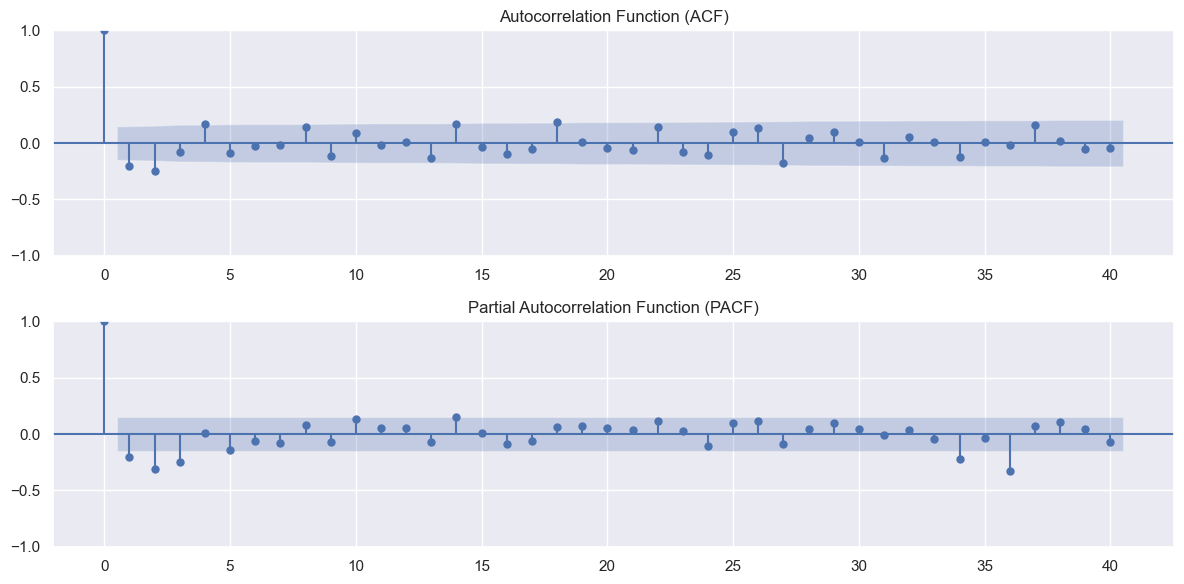

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF plots
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(2, 1, 1)
plot_acf(ts_data_diff, lags=40, ax=plt.gca(), title="Autocorrelation Function (ACF)")

# PACF plot
plt.subplot(2, 1, 2)
plot_pacf(ts_data_diff, lags=40, ax=plt.gca(), title="Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

Based on the ACF and PACF plots:

- The significant spike at lag 1 in both plots indicates that there is an autoregressive (AR) component of order p = 1.
- The abrupt drop after lag 1 in both plots indicates that there is a moving average (MA) component of order q = 1.

Since both p and q are 1, and the data is differenced once (d=1), the order of the ARIMA model is ARIMA(1, 1, 1).

#### ARIMA Model Fitting and Test Data Forecasting

In [17]:
# Determined order of ARIMA (p, d, q)
p = 1
d = 1
q = 1

# Create ARIMA model with the determined order (p, d, q)
arima_model = sm.tsa.ARIMA(train_data, order=(p, d, q))

# Fit the model to the training data
arima_results = arima_model.fit()

# Forecast on the test data
forecast_steps = len(test_data)
arima_forecast = arima_results.forecast(steps=forecast_steps)

# Convert the forecasted values to a DataFrame
arima_forecast_df = pd.DataFrame(arima_forecast).rename({'predicted_mean': 'Forecasted_Temperature'}, axis=1)

#### ARIMA Model Evaluation with scikit-learn (MAE, RMSE)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE) on test data
arima_mae = mean_absolute_error(test_data, arima_forecast_df)

# Calculate Root Mean Squared Error (RMSE) on test data
arima_rmse = np.sqrt(mean_squared_error(test_data, arima_forecast_df))

print("ARIMA Model - Mean Absolute Error (MAE): {:.2f}".format(arima_mae))
print("ARIMA Model - Root Mean Squared Error (RMSE): {:.2f}".format(arima_rmse))

ARIMA Model - Mean Absolute Error (MAE): 0.43
ARIMA Model - Root Mean Squared Error (RMSE): 0.49


#### Visualizing ARIMA Model Evaluation and Forecast with Plotly

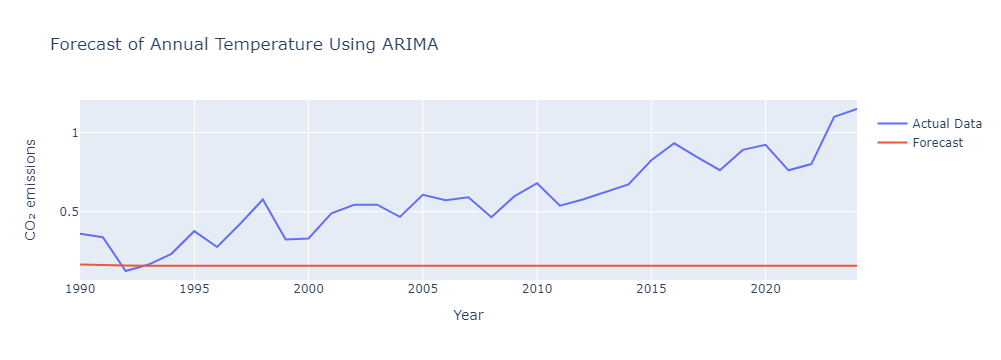

In [19]:
import plotly.graph_objects as go

# Create traces for the actual data and forecasted values on the test data
trace_actual = go.Scatter(x=test_data.index, y=test_data.values, mode='lines', name='Actual Data')
trace_arima_forecast = go.Scatter(x=arima_forecast_df.index, y=arima_forecast_df['Forecasted_Temperature'],
                            mode='lines', name='Forecast')

# Create layout for the plot
layout = go.Layout(title='Forecast of Annual Temperature Using ARIMA',
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='CO₂ emissions'),
                   legend=dict(x=1.02, y=0.95))

# Combine the traces and layout, and create the figure
fig = go.Figure(data=[trace_actual, trace_arima_forecast], layout=layout)

# Show the interactive plot
fig.show()

### Using Exponential Smoothing (ETS)

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [21]:
# Initialize and fit the ETS model
model = ExponentialSmoothing(train_data, trend='additive', damped=False)
ets_fit = model.fit()

# Make predictions for the test set
ets_forecast = ets_fit.forecast(steps=len(test_data))

In [22]:
# Evaluate the model
ets_mae = mean_absolute_error(test_data, ets_forecast)
ets_rmse = np.sqrt(mean_squared_error(test_data, ets_forecast))

print("Mean Absolute Error (MAE): {:.2f}".format(ets_mae))
print("Root Mean Squared Error (RMSE): {:.2f}".format(ets_rmse))

Mean Absolute Error (MAE): 0.33
Root Mean Squared Error (RMSE): 0.38


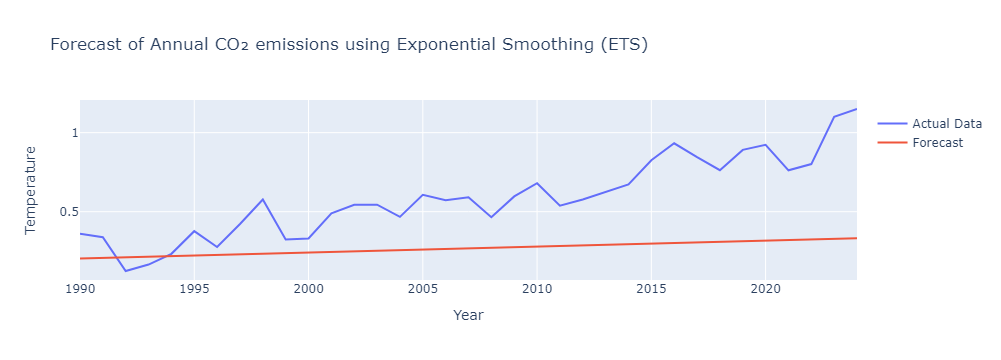

In [23]:
# Create traces for the actual data and forecasted values on the test data
trace_actual = go.Scatter(x=test_data.index, y=test_data.values, mode='lines', name='Actual Data')
trace_forecast = go.Scatter(x=test_data.index, y=ets_forecast, mode='lines', name='Forecast')

# Create layout for the plot
layout = go.Layout(title='Forecast of Annual CO₂ emissions using Exponential Smoothing (ETS)',
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='Temperature'),
                   legend=dict(x=1.02, y=0.95))

# Combine the traces and layout, and create the figure
fig = go.Figure(data=[trace_actual, trace_forecast], layout=layout)

# Show the interactive plot
fig.show()

### Using Prophet

In [24]:
import pandas as pd
import numpy as np
from prophet import Prophet
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
# Load the data
data = pd.read_csv('temp.csv')
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data = data.rename(columns={"Year": "ds", "Temperature": "y"}) # Reanme column to fit model

In [26]:
# Split the data into train and test sets
train_size = int(0.8 * len(data))  # 80% of data for training, 20% for testing
train_data = data[:train_size]
test_data = data[train_size:]

In [27]:
# Initialize Prophet model with seasonality disabled
model = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False)

# Fit the model to the training data
model.fit(train_data)

15:21:36 - cmdstanpy - INFO - Chain [1] start processing
15:21:36 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
# Make predictions for the test set
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)

# Extract the forecasted values for the test set
forecast_test = forecast[-len(test_data):]

In [29]:
# Evaluate the model
ph_mae = mean_absolute_error(test_data['y'], forecast_test['yhat'])
ph_rmse = np.sqrt(mean_squared_error(test_data['y'], forecast_test['yhat']))

print("Mean Absolute Error (MAE): {:.2f}".format(ph_mae))
print("Root Mean Squared Error (RMSE): {:.2f}".format(ph_rmse))

Mean Absolute Error (MAE): 0.55
Root Mean Squared Error (RMSE): 0.60


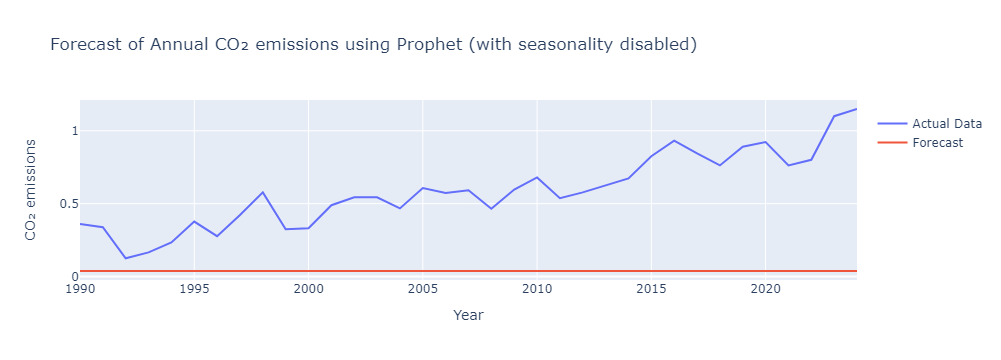

In [30]:
# Create traces for the actual data and forecasted values on the test data
trace_actual = go.Scatter(x=test_data['ds'], y=test_data['y'], mode='lines', name='Actual Data')
trace_forecast = go.Scatter(x=test_data['ds'], y=forecast_test['yhat'], mode='lines', name='Forecast')

# Create layout for the plot
layout = go.Layout(title='Forecast of Annual CO₂ emissions using Prophet (with seasonality disabled)',
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='CO₂ emissions'),
                   legend=dict(x=1.02, y=0.95))

# Combine the traces and layout, and create the figure
fig = go.Figure(data=[trace_actual, trace_forecast], layout=layout)

# Show the interactive plot
fig.show()

### Using Gradient Boosting Regressor

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import plotly.graph_objects as go

In [32]:
# Load the data
data = pd.read_csv('temp.csv')
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

In [33]:
# Split the data into train and test sets
train_size = int(0.8 * len(data))  # 80% of data for training, 20% for testing
train_data = data[:train_size]
test_data = data[train_size:]

In [34]:
# Extracting features (year) and target variable (CO2 emissions)
X_train = train_data['Year'].dt.year.values.reshape(-1, 1)
y_train = train_data['Temperature'].values
X_test = test_data['Year'].dt.year.values.reshape(-1, 1)
y_test = test_data['Temperature'].values

In [35]:
# Initialize and fit the Gradient Boosting Regressor model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions for the test set
y_pred = model.predict(X_test)

In [36]:
# Evaluate the model
gbr_mae = mean_absolute_error(y_test, y_pred)
gbr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE): {:.2f}".format(gbr_mae))
print("Root Mean Squared Error (RMSE): {:.2f}".format(gbr_rmse))

Mean Absolute Error (MAE): 0.40
Root Mean Squared Error (RMSE): 0.47


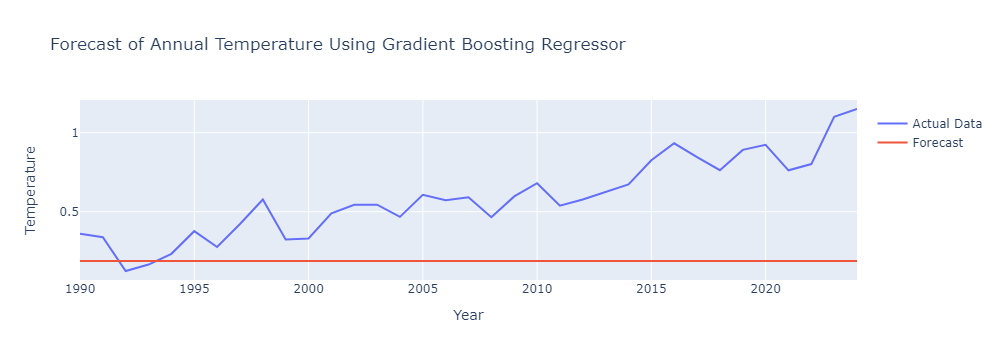

In [37]:
# Create traces for the actual data and forecasted values on the test data
trace_actual = go.Scatter(x=test_data['Year'], y=test_data['Temperature'], mode='lines', name='Actual Data')
trace_forecast = go.Scatter(x=test_data['Year'], y=y_pred, mode='lines', name='Forecast')

# Create layout for the plot
layout = go.Layout(title='Forecast of Annual Temperature Using Gradient Boosting Regressor',
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='Temperature'),
                   legend=dict(x=1.02, y=0.95))

# Combine the traces and layout, and create the figure
fig = go.Figure(data=[trace_actual, trace_forecast], layout=layout)

# Show the interactive plot
fig.show()

### Using LSTM

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import plotly.graph_objects as go

In [39]:
# Load the data
data = pd.read_csv('temp.csv')
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

In [40]:
# Split the data into train and test sets
train_size = int(0.8 * len(data))  # 80% of data for training, 20% for testing
train_data = data[:train_size]
test_data = data[train_size:]

In [41]:
# Normalize the data
scaler = MinMaxScaler()
scaler.fit(train_data[['Temperature']])
train_data['Scaled Temperature'] = scaler.transform(train_data[['Temperature']])
test_data['Scaled Temperature'] = scaler.transform(test_data[['Temperature']])

In [42]:
# Prepare data for LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 5
X_train, y_train = create_dataset(train_data['Scaled Temperature'], train_data['Scaled Temperature'], time_steps)
X_test, y_test = create_dataset(test_data['Scaled Temperature'], test_data['Scaled Temperature'], time_steps)

In [43]:
# Reshape input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [44]:
print(X_train.shape)
print(X_test.shape)

(135, 5, 1)
(30, 5, 1)


In [45]:
# Build LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
# Train the model for 100 epochs
r = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data = (X_test, y_test))

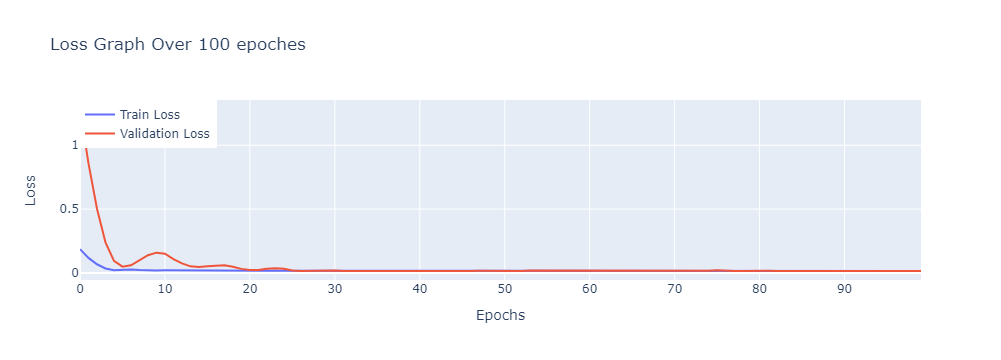

In [48]:
# Plot loss
fig = go.Figure()

# Add training loss
fig.add_trace(go.Scatter(x=list(range(len(r.history['loss']))), y=r.history['loss'],
                         mode='lines', name='Train Loss'))

# # Add validation loss
fig.add_trace(go.Scatter(x=list(range(len(r.history['val_loss']))), y=r.history['val_loss'],
                         mode='lines', name='Validation Loss'))

# Update layout
fig.update_layout(title="Loss Graph Over 100 epoches",
                  xaxis_title="Epochs",
                  yaxis_title="Loss",
                  legend=dict(x=0, y=1, traceorder="normal"))

fig.show()

In [49]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse scaling
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Evaluate the model
lstm_mae = mean_absolute_error(y_test_inv, y_pred_inv)
lstm_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print("Mean Absolute Error (MAE): {:.2f}".format(lstm_mae))
print("Root Mean Squared Error (RMSE): {:.2f}".format(lstm_rmse))

1/1 [==============================] - 0s 452ms/step
Mean Absolute Error (MAE): 0.09
Root Mean Squared Error (RMSE): 0.11


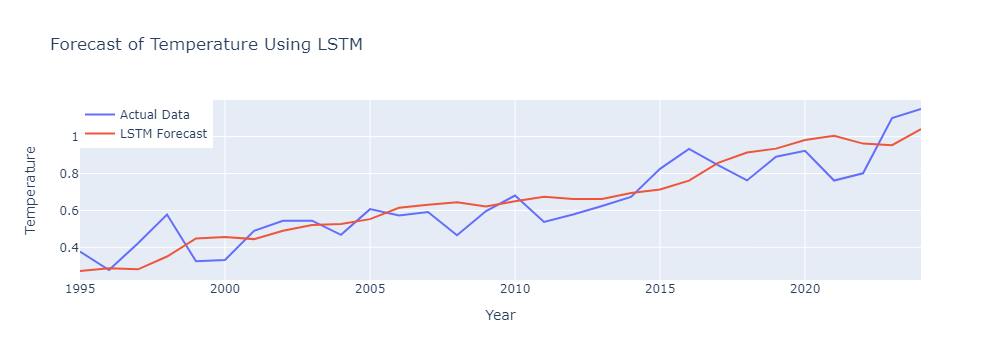

In [50]:
# Plot the actual data and predicted values
fig = go.Figure()

# Plot actual data
fig.add_trace(go.Scatter(x=test_data['Year'][time_steps:], y=test_data['Temperature'][time_steps:], mode='lines', name='Actual Data'))

# Plot predicted values
fig.add_trace(go.Scatter(x=test_data['Year'][time_steps:], y=y_pred_inv.flatten(), mode='lines', name='LSTM Forecast'))

# Set the layout
fig.update_layout(title='Forecast of Temperature Using LSTM',
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='Temperature'),
                   legend=dict(x=0, y=1))

# Show the plot
fig.show()

### Comparing Models Perfromance

In [51]:
# Evaluate Both models on the test data
models = ['ARIMA', 'ExponentialSmoothing', 'Prophet', 'GBR', 'LSTM']
mae_results = [arima_mae, ets_mae, ph_mae, gbr_mae, lstm_mae]
rmse_results = [arima_rmse, ets_rmse, ph_rmse, gbr_rmse, lstm_rmse]

# Create a DataFrame to store the evaluation results
evaluation_df = pd.DataFrame({'Model': models, 
                              'MAE': mae_results, 
                              'RMSE': rmse_results
                             })

# Display the evaluation results DataFrame
evaluation_df.sort_values(by='RMSE', inplace=True)
evaluation_df.set_index('Model', inplace=True)

evaluation_df

MAE      RMSE
Model                                   
LSTM                  0.092315  0.112226
ExponentialSmoothing  0.325667  0.382264
GBR                   0.401961  0.467406
ARIMA                 0.428853  0.493202
Prophet               0.547488  0.600451

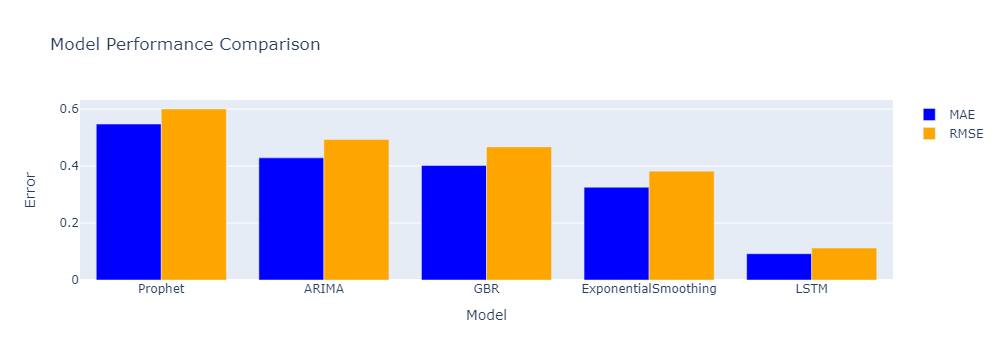

In [52]:
# Create traces
mae_trace = go.Bar(x=models, y=mae_results, name='MAE', marker=dict(color='blue'))
rmse_trace = go.Bar(x=models, y=rmse_results, name='RMSE', marker=dict(color='orange'))

# Create figure
fig = go.Figure(data=[mae_trace, rmse_trace])

# Update layout
fig.update_layout(title='Model Performance Comparison',
                  xaxis_title='Model',
                  yaxis_title='Error',
                  barmode='group')

# Sort results in descending order based on RMSE
sorted_indices = sorted(range(len(rmse_results)), key=lambda k: rmse_results[k], reverse=True)
sorted_models = [models[i] for i in sorted_indices]
sorted_mae_results = [mae_results[i] for i in sorted_indices]
sorted_rmse_results = [rmse_results[i] for i in sorted_indices]

# Update figure data with sorted results
fig.data[0]['x'] = sorted_models
fig.data[0]['y'] = sorted_mae_results
fig.data[1]['x'] = sorted_models
fig.data[1]['y'] = sorted_rmse_results

# Show figure
fig.show()

**Insights from Comparison**
From the evaluation results, it's clear that the LSTM model outperforms the other models in terms of both Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). 
1. **LSTM Dominance**: The LSTM model achieved the lowest MAE and RMSE among all the models evaluated. This suggests that the LSTM model has better predictive performance compared to ARIMA, Exponential Smoothing, Prophet, and Gradient Boosting Regression (GBR) models for the given task or dataset.

2. **Traditional Methods Performance**: ARIMA, Exponential Smoothing, and Prophet models have higher MAE and RMSE compared to the LSTM model. This indicates that in this particular scenario, traditional time series forecasting methods might not capture the complexities or patterns present in the data as effectively as the LSTM model.

3. **Comparison with GBR**: The GBR model performed similarly to ARIMA in terms of both MAE and RMSE. This suggests that for this particular dataset, the GBR model didn't provide significant improvement over the simpler ARIMA model.

4. **Prophet Performance**: The Prophet model, while widely used and popular for its simplicity and robustness, yielded higher errors compared to the LSTM model and other traditional methods. This indicates that for this specific dataset or task, Prophet might not have been able to capture the underlying patterns as effectively.

In summary, based on the evaluation results, the LSTM model appears to be the most suitable choice for this forecasting task, offering lower errors compared to other models.

## Future Forcasting Using the best model (LSTM)

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import plotly.graph_objects as go

In [99]:
# Load the data
data = pd.read_csv('temp.csv')
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

In [100]:
# Normalize the data
scaler = MinMaxScaler()
scaler.fit(data[['Temperature']])
data['Scaled Temperature'] = scaler.transform(data[['Temperature']])

In [103]:
# Prepare data for LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 5
X_train, y_train = create_dataset(data['Scaled Temperature'], data['Scaled Temperature'], time_steps)

In [104]:
# Reshape input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(170, 5, 1)


In [105]:
# Build LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
# Train the model
r = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

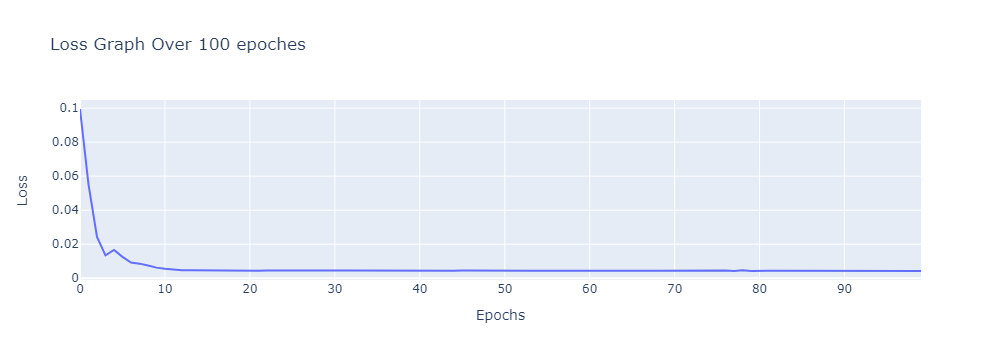

In [107]:
# Plot loss
fig = go.Figure()

# Add training loss
fig.add_trace(go.Scatter(x=list(range(len(r.history['loss']))), y=r.history['loss'],
                         mode='lines', name='Train Loss'))

# Update layout
fig.update_layout(title="Loss Graph Over 100 epoches",
                  xaxis_title="Epochs",
                  yaxis_title="Loss",
                  legend=dict(x=0, y=1, traceorder="normal"))

fig.show()

In [115]:
y_train[-time_steps:]

array([0.8701821 , 0.7780291 , 0.80057859, 0.97170822, 1.        ])

In [116]:
# Predict temperature for the next 6 years
future_predictions = []
last_window =  y_train[-time_steps:].reshape(1, time_steps, 1)

In [117]:
for _ in range(6):
    prediction = model.predict(last_window)[0][0]
    print(last_window)
    future_predictions.append(prediction)
    last_window = np.append(last_window[:, 1:, :], [[[prediction]]], axis=1) 
    
print(future_predictions)

1/1 [==============================] - 0s 27ms/step
[[[0.8701821 ]
  [0.7780291 ]
  [0.80057859]
  [0.97170822]
  [1.        ]]]
1/1 [==============================] - 0s 25ms/step
[[[0.7780291 ]
  [0.80057859]
  [0.97170822]
  [1.        ]
  [0.95359963]]]
1/1 [==============================] - 0s 25ms/step
[[[0.80057859]
  [0.97170822]
  [1.        ]
  [0.95359963]
  [0.97822988]]]
1/1 [==============================] - 0s 27ms/step
[[[0.97170822]
  [1.        ]
  [0.95359963]
  [0.97822988]
  [1.02787042]]]
1/1 [==============================] - 0s 26ms/step
[[[1.        ]
  [0.95359963]
  [0.97822988]
  [1.02787042]
  [1.08092701]]]
1/1 [==============================] - 0s 24ms/step
[[[0.95359963]
  [0.97822988]
  [1.02787042]
  [1.08092701]
  [1.10677242]]]
[0.95359963, 0.9782299, 1.0278704, 1.080927, 1.1067724, 1.1341773]


In [118]:
# Inverse scaling for the predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [119]:
future_predictions

array([[1.0686724],
       [1.1117078],
       [1.1984426],
       [1.291146 ],
       [1.3363045],
       [1.3841879]], dtype=float32)

In [120]:
# Generate future years (2025, 2026, 2027, 2028, 2029, 2030)
future_years = pd.date_range(start=data['Year'].iloc[-1] + pd.DateOffset(years=1), periods=6, freq='Y')

# Create a DataFrame for the future predictions
future_data = pd.DataFrame({'Year': future_years, 'Temperature': future_predictions.flatten()})

future_data

Year  Temperature
0 2025-12-31     1.068672
1 2026-12-31     1.111708
2 2027-12-31     1.198443
3 2028-12-31     1.291146
4 2029-12-31     1.336305
5 2030-12-31     1.384188

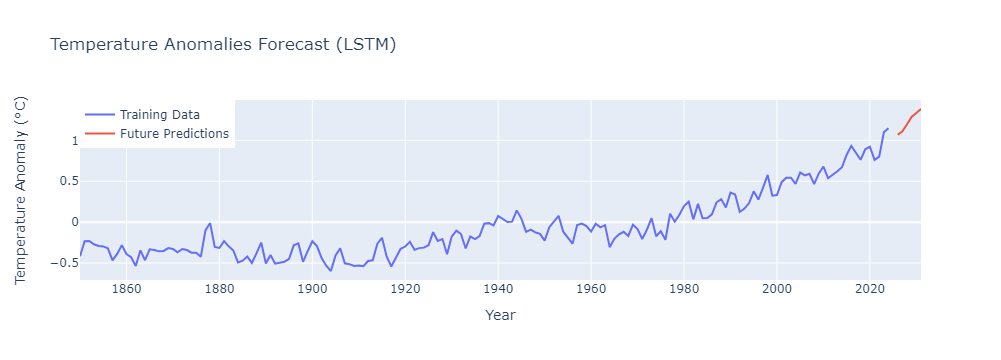

In [121]:
# Concatenate the original training data and the future predictions
forecast_data = pd.concat([data[['Year', 'Temperature']], future_data])

# Plot the training data and the future predictions
fig = go.Figure()

# Add training data
fig.add_trace(go.Scatter(x=data['Year'], y=data['Temperature'], mode='lines', name='Training Data'))

# Add future predictions
fig.add_trace(go.Scatter(x=future_data['Year'], y=future_data['Temperature'], mode='lines', name='Future Predictions'))

# Update layout
fig.update_layout(title='Temperature Anomalies Forecast (LSTM)',
                  xaxis_title='Year',
                  yaxis_title='Temperature Anomaly (°C)',
                  legend=dict(x=0, y=1, traceorder="normal"))

fig.show()
